### Definition for white noise

1. constant mean
2. constant variance
3. no autocorrelation

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
### prepare data
raw_csv = pd.read_csv("resources/Index2018.csv")
df_comp = raw_csv.copy()

### keep only one column
df_comp['date'] = pd.to_datetime(df_comp.date , dayfirst = True)
df_comp.set_index('date' , inplace = True)
df_comp['market_value'] = df_comp.spx
df_comp = df_comp[['market_value']]

### train test split
size = int(len(df_comp) * 0.8)
df_train , df_test = df_comp.iloc[:size] , df_comp.iloc[size:]

### White noise

In [22]:
wn = np.random.normal(loc = df_train['market_value'].mean() , scale = df_train.market_value.std() ,\
                      size = len(df_train))


In [23]:
df_train['wn'] = wn

/var/folders/j3/x1nvf_l57xv1hc1n_hx87lv00000gn/T/ipykernel_31715/2767877954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['wn'] = wn


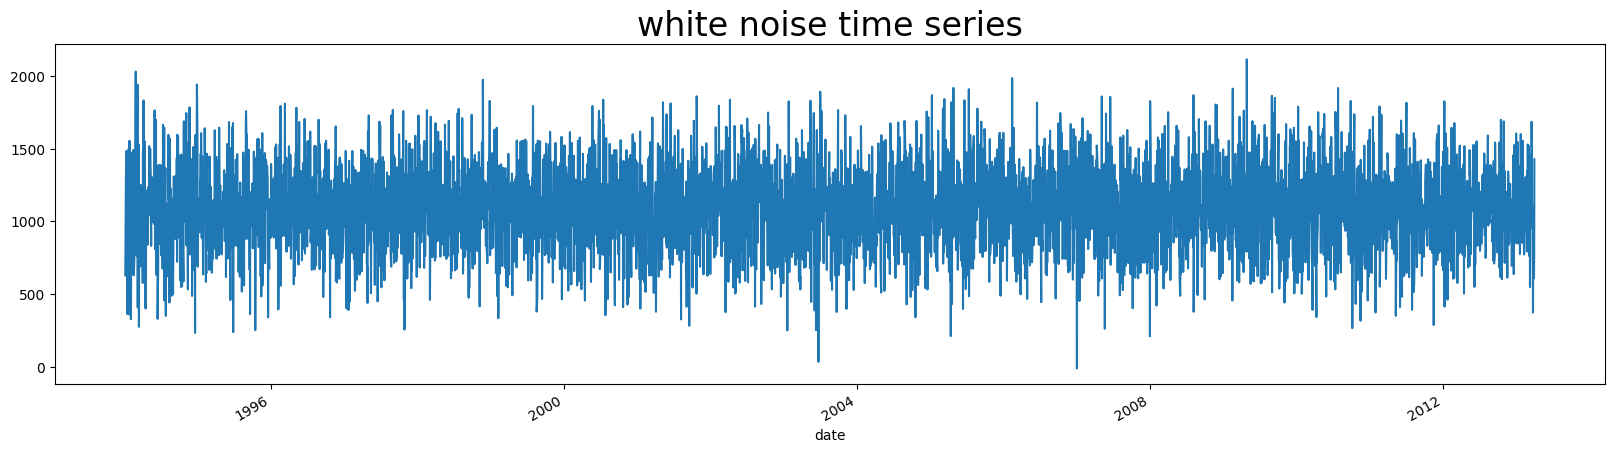

In [29]:
df_train.wn.plot(figsize = (20 , 5))
plt.title("white noise time series" , size = 24)
plt.show()

In [ ]:
df_train.market_value.plot(figsize = (20 , 5))
